[View in Colaboratory](https://colab.research.google.com/github/freesemt/stewart-acid-base-model/blob/master/notebooks/fig_12.ipynb)

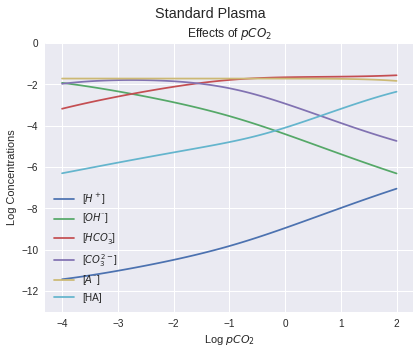

In [3]:
import numpy                as np
import matplotlib.pyplot    as plt
from matplotlib.ticker import FormatStrFormatter
import sys
sys.path.append('local_modules/OurUtils')
from StewartModel import Fh4, Kw, Kc, K3
MILI = 1e-3
KILO = 1e3

Atot = 0.019
SID = 42*MILI
pCO2 = np.logspace(-4, 2, 100)
Log_pCO2 = np.log10(pCO2)

fig = plt.figure( figsize=(6, 5) )
fig.suptitle( "Standard Plasma" )

ax  = fig.add_subplot(111)
ax.set_title( "Effects of $pCO_2$" )
ax.set_xlabel( "Log $pCO_2$" )
ax.set_ylabel( "Log Concentrations" )
ax.set_ylim( -13, 0 )

H   = Fh4(SID, Atot, pCO2 )
ax.plot(Log_pCO2, np.log10(H), label='[$H^+$]')
OH  = Kw/H
ax.plot(Log_pCO2, np.log10(OH), label='[$OH^⁻$]')
HCO3 = Kc*pCO2/H
ax.plot(Log_pCO2, np.log10(HCO3), label='[$HCO_3^⁻$]')
CO3 = K3*HCO3/H
ax.plot(Log_pCO2, np.log10(CO3), label='[$CO_3^{2-}$]')
A   = SID + H - HCO3 - CO3 - OH
ax.plot(Log_pCO2, np.log10(A), label='[$A^⁻$]')
HA  = Atot - A
ax.plot(Log_pCO2, np.log10(HA), label='[HA]')

ax.legend()
fig.tight_layout()
fig.subplots_adjust( top=0.88 )

plt.show()
